<p style="text-align:center"><img src=../images/header.png/></p>

<p style="text-align:center"><img src="https://camo.githubusercontent.com/4a300a0747dc7b5c69a83cc94ff2e2b5ad1f0f937ed3d142b171c0d4a6f8e164/68747470733a2f2f7777772e67652e636f6d2f72656e657761626c65656e657267792f73697465732f64656661756c742f66696c65732f323032302d30312f6f6e73686f72652d6865726f352e6a7067"/></p>


<h1 align="center">ARIMA - Modell</h1>

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

#### Please fill in the path to the preprocessed data.

In [2]:
pre_path = "../data/preprocessed/measurement_windio_msb-0002-a_2021-10-21.csv"

#### Please fill in your desired resample frequency.
Y <==> Year <br>
Q <==> Quarter <br>
M <==> Month <br>
W <==> Week <br>
D <==> Day <br>
H <==> Hour <br>
T <==> Minute <br>
S <==> Second

In [3]:
res_freq = "S"

#### The following cell shows your preprocessed input data.

In [4]:
df = pd.read_csv(pre_path, parse_dates=["date_time"], index_col="date_time")
df = df.resample(res_freq).mean()
df.head()

,uptime,acc_x,acc_y,acc_z,rot_x,rot_y,rot_z,mag_x,mag_y,mag_z,temp
date_time,,,,,,,,,,,
2021-10-21 09:42:23,54005.550714,-0.029480,-0.022701,0.978568,0.940022,0.692475,-0.811341,-295.214286,37.571429,-271.071429,2891.428571
2021-10-21 09:42:24,54006.192708,-0.033140,-0.020509,0.977184,0.929389,0.679071,-0.820929,-293.625000,40.270833,-267.333333,2884.333333
2021-10-21 09:42:25,54007.194167,-0.034906,-0.019583,0.976885,0.890585,0.663804,-0.771628,-294.020833,39.916667,-271.500000,2879.333333
2021-10-21 09:42:26,54008.193958,-0.035577,-0.023463,0.977151,0.908715,0.634224,-0.790712,-292.500000,40.854167,-265.729167,2887.666667
2021-10-21 09:42:27,54009.192292,-0.029603,-0.024028,0.977402,0.922074,0.691158,-0.796120,-292.416667,42.208333,-262.937500,2888.333333


#### Removes the columns that are not needed and all empty values.

In [5]:
df.drop(['uptime', 'mag_x', 'mag_y', 'mag_z', 'temp'], axis=1, inplace=True)
df.dropna(inplace = True)
df.head()

,acc_x,acc_y,acc_z,rot_x,rot_y,rot_z
date_time,,,,,,
2021-10-21 09:42:23,-0.029480,-0.022701,0.978568,0.940022,0.692475,-0.811341
2021-10-21 09:42:24,-0.033140,-0.020509,0.977184,0.929389,0.679071,-0.820929
2021-10-21 09:42:25,-0.034906,-0.019583,0.976885,0.890585,0.663804,-0.771628
2021-10-21 09:42:26,-0.035577,-0.023463,0.977151,0.908715,0.634224,-0.790712
2021-10-21 09:42:27,-0.029603,-0.024028,0.977402,0.922074,0.691158,-0.796120


#### Please fill in the column which should be forecasted.

In [6]:
col_forecast = "acc_x"

#### Plots the column which should be forecasted.

<AxesSubplot:xlabel='date_time', ylabel='acc_x'>

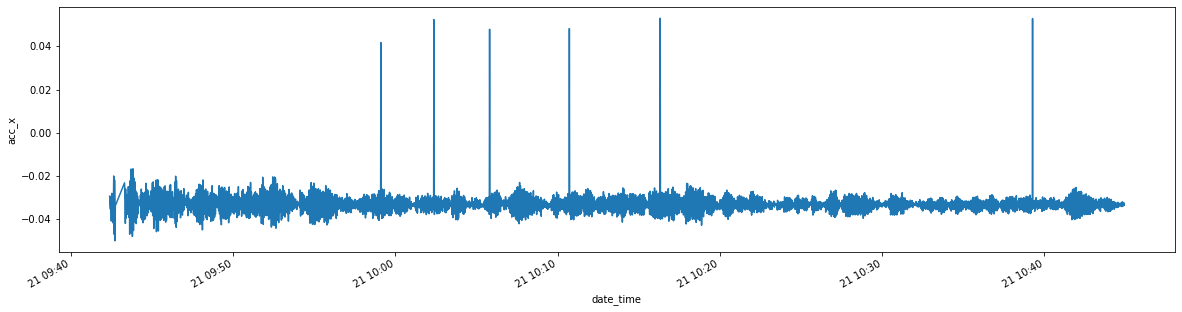

In [7]:
df[col_forecast].plot(figsize=(20,5), ylabel=col_forecast)

#### Devides the dataset into train and test data

In [8]:
train = df.iloc[:-(round(0.02*len(df)))]
test=df.iloc[-(round(0.02*len(df))):]

#### Trains the ARIMA Modell and calculates the preiction

In [9]:
model = ARIMA(train[col_forecast], order=(5,1,5))
model = model.fit()
pred=model.predict(start=len(train), end=len(train)+len(test)-1, typ="levels")
pred.index=df.index[len(train):len(train)+len(test)]

#### Plots the testdata and ARIMA prediction

<AxesSubplot:title={'center':'Testdata and ARIMA prediction'}, xlabel='date_time', ylabel='acc_x'>

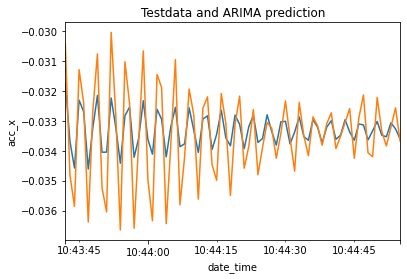

In [10]:
pred.plot(title = "Testdata and ARIMA prediction", ylabel=col_forecast)
test[col_forecast].plot()

#### Calculates the RMSE value between testdata and prediction

In [11]:
rmse = sqrt(mean_squared_error(pred, test[col_forecast]))
print(rmse)

0.001039944635409317


#### Calculates the mean value of the testdata

In [12]:
test[col_forecast].mean()

-0.03345148314915158

#### Plots the RMSE value between testdata and prediction for different time_intervals

In [ ]:
df2 = pd.DataFrame(data={'date_time': [0], 'rmse': [0]})
for i in range(1,10,1):    
    train = df.iloc[:-(round(0.01*i*len(df)))]
    test=df.iloc[-(round(0.01*i*len(df))):]
    model = ARIMA(train[col_forecast], order=(5,1,5))
    model = model.fit()
    pred=model.predict(start=len(train), end=len(train)+len(test)-1, typ="levels")
    pred.index=df.index[len(train):len(train)+len(test)]
    rmse = sqrt(mean_squared_error(pred, test[col_forecast]))
    df2 = df2.append({'date_time': len(test), 'rmse': rmse}, ignore_index=True)
df2["std"] = test[col_forecast].std()
df2.plot(legend=True, x="date_time", y=["rmse", "std"], title="RMSE over time")